In [ ]:
!pip install joypy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats as st
import random
import joypy

In [ ]:
def time_to_reseal(ProofRefreshWindow, number_of_refreshes, beta_value, MaxProofDuration = 540):
  ProofExpiry = (number_of_refreshes + 1)*MaxProofDuration - (number_of_refreshes)*ProofRefreshWindow
  ProofRefreshStart = (number_of_refreshes + 1)*MaxProofDuration - (number_of_refreshes + 1)*ProofRefreshWindow

  if number_of_refreshes == 0:
    ProofLastRefreshed = 0
  else:
    lower_bound = (number_of_refreshes)*MaxProofDuration - (number_of_refreshes)*ProofRefreshWindow
    upper_bound = (number_of_refreshes)*MaxProofDuration - (number_of_refreshes - 1)*ProofRefreshWindow

    X = np.random.beta(beta_value,1)
    ProofLastRefreshed = (ProofRefreshWindow)*X + lower_bound

  if number_of_refreshes == 5:
    BugDiscovered = np.random.uniform(low = ProofLastRefreshed, high = 1825)
    TimeToResealStart = BugDiscovered
    ProofExpiry = 1825
    reseal_time = ProofExpiry - TimeToResealStart

  else:
    BugDiscovered = np.random.uniform(low = ProofLastRefreshed, high = ProofExpiry)
    if ProofRefreshStart < BugDiscovered < ProofExpiry:
        delta = random.randint(0,min(int(ProofExpiry - BugDiscovered),7))
        TimeToResealStart = BugDiscovered + delta
        ProofExpiry = (number_of_refreshes + 2)*MaxProofDuration - (number_of_refreshes + 1)*ProofRefreshWindow
    else:
      TimeToResealStart = BugDiscovered
    reseal_time = ProofExpiry - TimeToResealStart


  return reseal_time

In [ ]:
def generate_num_refreshes(ProofRefreshWindow, MaxProofDuration = 540):
  if (4*MaxProofDuration - 3*ProofRefreshWindow) >= 1825:
    random_number = np.random.uniform(low = 0, high = 100)

    if random_number <= 50:
      return 0
    elif (random_number > 50) and  (random_number <= 75):
      return 1
    elif (random_number > 75) and  (random_number <= 90):
      return 2
    else:
      return 3

  else:
    random_number = np.random.uniform(low = 0, high = 100)

    if random_number <= 45:
      return 0
    elif (random_number > 45) and  (random_number <= 70):
      return 1
    elif (random_number > 70) and  (random_number <= 85):
      return 2
    elif (random_number > 85) and  (random_number <= 90):
      return 3
    else:
      return 4

In [ ]:
x_list = np.arange(1,170)
y_list_a = []
y_list_b = []
y_list_c = []

df = pd.DataFrame()

for i in range(100000):
  y1_list = []
  y2_list = []
  y3_list = []

  for x in x_list:
    num_of_refreshes = generate_num_refreshes(x)
    y1_list.append(time_to_reseal(x, num_of_refreshes, 1))
    y2_list.append(time_to_reseal(x, num_of_refreshes, 2))
    y3_list.append(time_to_reseal(x, num_of_refreshes, 3))

  y_list_a.append(y1_list)
  y_list_b.append(y2_list)
  y_list_c.append(y3_list)

y_list_a = np.array(y_list_a)
y_list_b = np.array(y_list_b)
y_list_c = np.array(y_list_c)

df['Beta1'] = np.median(y_list_a, axis=0)
df['Beta2'] = np.median(y_list_b, axis=0)
df['Beta3'] = np.median(y_list_c, axis=0)
df['ProofRefreshWindow'] = x_list

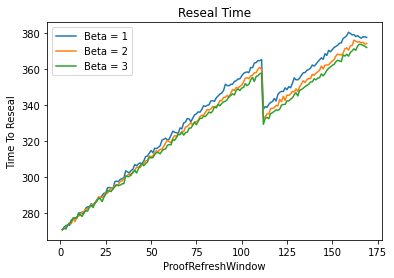

In [ ]:
plt.plot(df['ProofRefreshWindow'], df['Beta1'], label = 'Beta = 1')
plt.plot(df['ProofRefreshWindow'], df['Beta2'], label = 'Beta = 2')
plt.plot(df['ProofRefreshWindow'], df['Beta3'], label = 'Beta = 3')
plt.title('Reseal Time')
plt.xlabel('ProofRefreshWindow')
plt.ylabel('Time To Reseal')
plt.legend()
plt.show()

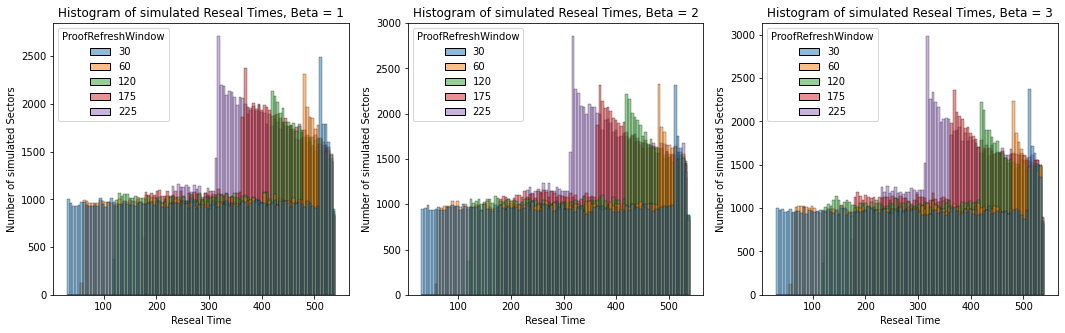

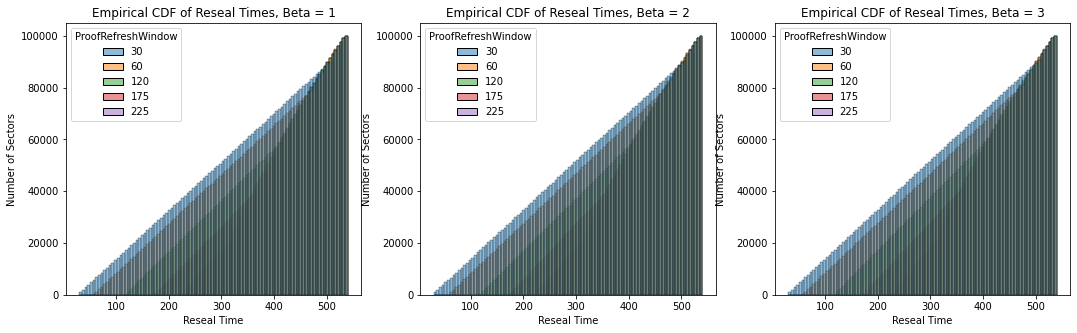

In [ ]:
df = pd.DataFrame()
df_i = pd.DataFrame({'Reseal Time':[], 'ProofRefreshWindow':[], 'GammaValue': []})
days = [30,60,120,175,225]

for gamma in range(3):
  for day in days:
    plot_list = [time_to_reseal(day, generate_num_refreshes(day),gamma+1) for i in range(100000)]
    df_i['Reseal Time'] = plot_list
    df_i['ProofRefreshWindow'] = str(day)
    df_i['GammaValue'] = str(gamma+1)
    df = df.append(df_i)

df.reset_index(inplace=True)


df_gamma1 = df.loc[df['GammaValue'] =='1']
df_gamma2 = df.loc[df['GammaValue'] == '2']
df_gamma3 = df.loc[df['GammaValue'] == '3']

# seaborn histogram
fig, ax =plt.subplots(1,3, figsize=(18, 5))
sns.histplot(data=df_gamma1, x='Reseal Time', hue="ProofRefreshWindow", ax = ax[0]).set(title='Histogram of simulated Reseal Times, Beta = 1', ylabel = 'Number of simulated Sectors', xlabel = 'Reseal Time')
sns.histplot(data=df_gamma2, x='Reseal Time', hue="ProofRefreshWindow", ax = ax[1]).set(title='Histogram of simulated Reseal Times, Beta = 2', ylabel = 'Number of simulated Sectors', xlabel = 'Reseal Time')
sns.histplot(data=df_gamma3, x='Reseal Time', hue="ProofRefreshWindow", ax = ax[2]).set(title='Histogram of simulated Reseal Times, Beta = 3', ylabel = 'Number of simulated Sectors', xlabel = 'Reseal Time')
fig.show();

# seaborn histogram
fig, ax =plt.subplots(1,3, figsize=(18, 5))
sns.histplot(data=df_gamma1, x='Reseal Time', hue="ProofRefreshWindow", ax = ax[0], cumulative = True).set(title='Empirical CDF of Reseal Times, Beta = 1', ylabel = 'Number of Sectors', xlabel = 'Reseal Time')
sns.histplot(data=df_gamma2, x='Reseal Time', hue="ProofRefreshWindow", ax = ax[1], cumulative = True).set(title='Empirical CDF of Reseal Times, Beta = 2', ylabel = 'Number of Sectors', xlabel = 'Reseal Time')
sns.histplot(data=df_gamma3, x='Reseal Time', hue="ProofRefreshWindow", ax = ax[2], cumulative = True).set(title='Empirical CDF of Reseal Times, Beta = 3', ylabel = 'Number of Sectors', xlabel = 'Reseal Time')
fig.show();

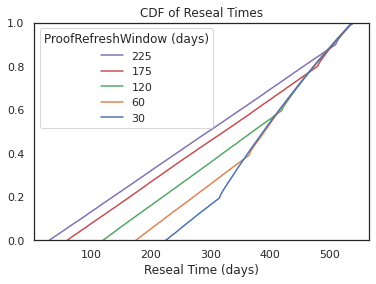

In [ ]:
sns.ecdfplot(data=df_gamma1, x="Reseal Time", hue="ProofRefreshWindow").set(title='CDF of Reseal Times', ylabel = '', xlabel = 'Reseal Time (days)')
plt.legend(title='ProofRefreshWindow (days)', labels = ['225','175','120','60','30'])


<ipython-input-7-d9c06503c0f0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gamma1['ProofRefreshWindow'] = df_gamma1['ProofRefreshWindow'].astype(cat_month)


<Figure size 432x288 with 0 Axes>

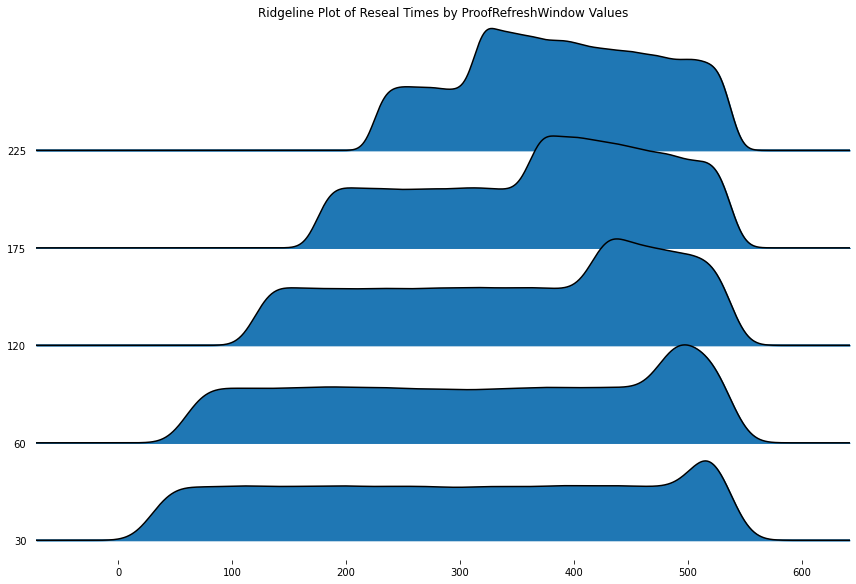

In [ ]:
from joypy import joyplot
from pandas.api.types import CategoricalDtype

cat_month = CategoricalDtype(
    ['225', '175', '120', '60', '30']
)

df_gamma1['ProofRefreshWindow'] = df_gamma1['ProofRefreshWindow'].astype(cat_month)

plt.figure()

fig, axes = joyplot(
    data=df_gamma1[['Reseal Time', 'ProofRefreshWindow']], 
    by='ProofRefreshWindow',
    figsize=(12, 8)
)
plt.title('Ridgeline Plot of Reseal Times by ProofRefreshWindow Values')
plt.show()

Text(0.53, 1.05, 'PDF of Reseal Times')

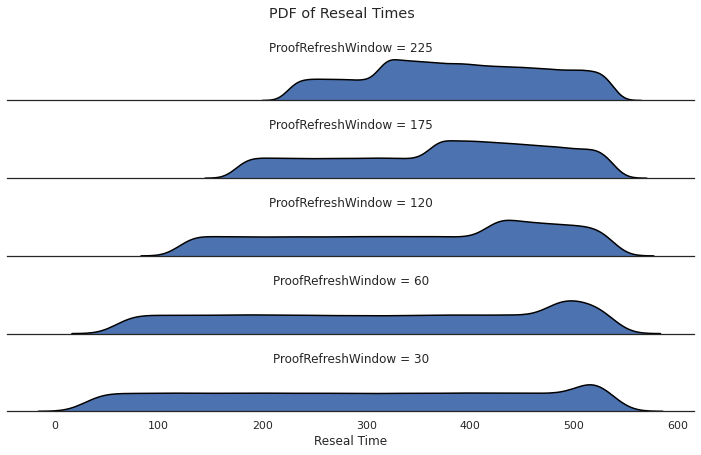

In [ ]:
sns.set_theme(style="white")
g = sns.FacetGrid(df_gamma1, row="ProofRefreshWindow", aspect=9, height=1.2)
g.map_dataframe(sns.kdeplot, x="Reseal Time", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="Reseal Time", color = 'black')
g.set(yticks=[], ylabel="")
g.despine(left=True)
plt.suptitle('PDF of Reseal Times', x = 0.53, y = 1.05)

In [ ]:
df_gamma1.head(5)

,index,Reseal Time,ProofRefreshWindow,GammaValue,cumsum_reseal_time
0,0,116.268426,30,1,116.268426
1,1,430.677097,30,1,546.945524
2,2,120.587763,30,1,667.533286
3,3,504.711412,30,1,1172.244698
4,4,239.596688,30,1,1411.841386
